## Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the given Data
df=pd.read_csv('glass.csv')
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [8]:
# Prepare the KNN model
from sklearn.neighbors import KNeighborsClassifier as KNC

In [9]:
model=KNC(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
kfold=KFold(n_splits=8)
results=cross_val_score(model,X,Y,cv=kfold)
results

array([0.55555556, 0.7037037 , 0.88888889, 0.40740741, 0.40740741,
       0.22222222, 0.        , 0.        ])

In [12]:
k_range=range(1,20)
k_scores=[]
for k in k_range:
  knn=KNC(n_neighbors=k)
  scores=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

In [13]:
k_scores

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
yhat_train = model.predict(x_train)

In [16]:
confusion_matrix(y_train, yhat_train)

array([[51,  8,  0,  0,  0,  0],
       [14, 47,  1,  0,  0,  0],
       [11,  1,  2,  0,  0,  0],
       [ 0,  6,  0,  2,  0,  1],
       [ 3,  2,  0,  0,  0,  1],
       [ 3,  2,  0,  1,  0, 15]], dtype=int64)

In [17]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           1       0.62      0.86      0.72        59
           2       0.71      0.76      0.73        62
           3       0.67      0.14      0.24        14
           5       0.67      0.22      0.33         9
           6       0.00      0.00      0.00         6
           7       0.88      0.71      0.79        21

    accuracy                           0.68       171
   macro avg       0.59      0.45      0.47       171
weighted avg       0.67      0.68      0.65       171



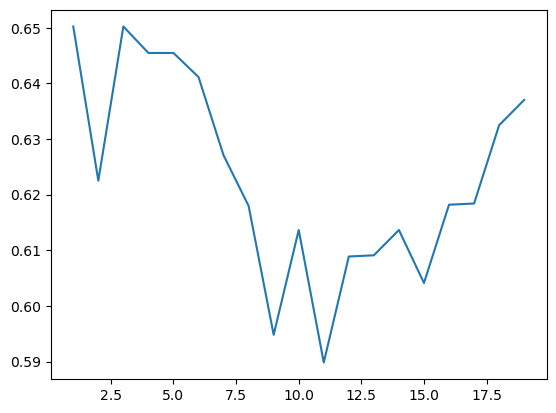

In [18]:
plt.plot(k_range,k_scores)
plt.show()

In [19]:
# Final model
final_model=KNC(n_neighbors=12)
final_model.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=12)

In [20]:
kfold=KFold(n_splits=10)
results1=cross_val_score(final_model,X,Y,cv=kfold)
results1

array([0.5       , 0.81818182, 0.72727273, 0.90909091, 0.19047619,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [21]:
k_range1=range(1,20)
k_scores1=[]
for k in k_range:
  knn1=KNC(n_neighbors=k)
  scores1=cross_val_score(knn1,X,Y,cv=10,scoring='accuracy')
  k_scores1.append(scores1.mean())

In [22]:
k_scores1

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987]

In [23]:
yhat_test = final_model.predict(x_test)

In [24]:
confusion_matrix(y_test, yhat_test)

array([[6, 5, 0, 0, 0, 0],
       [7, 7, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 3],
       [1, 0, 0, 0, 0, 2],
       [0, 1, 0, 0, 0, 7]], dtype=int64)

In [25]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           1       0.38      0.55      0.44        11
           2       0.47      0.50      0.48        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.58      0.88      0.70         8

    accuracy                           0.47        43
   macro avg       0.24      0.32      0.27        43
weighted avg       0.36      0.47      0.40        43



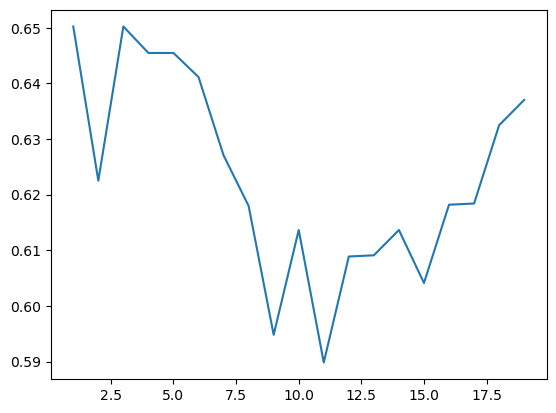

In [26]:
plt.plot(k_range1,k_scores1)
plt.show()

## Implement a KNN model to classify the animals in to categorie


In [27]:
#Read the Given Data
df1=pd.read_csv("Zoo.csv")
df1.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [28]:
df1.drop(['animal name'],axis=1,inplace=True)
df1.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         0         0     1     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1

In [29]:
df1.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [31]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [33]:
zoo_model=KNC(n_neighbors=8)
zoo_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
kfold1=KFold(n_splits=8)
results=cross_val_score(zoo_model,x,y,cv=kfold1)
results

array([1.        , 0.69230769, 1.        , 0.92307692, 0.84615385,
       0.66666667, 0.66666667, 0.66666667])

In [35]:
k_range=range(1,20)
k_scores=[]
for k in k_range:
  knn=KNC(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

In [36]:
k_scores

[0.9800000000000001,
 0.9400000000000001,
 0.95,
 0.9200000000000002,
 0.8809090909090909,
 0.8709090909090909,
 0.8418181818181818,
 0.8118181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819]

In [37]:
yhat_train1 = zoo_model.predict(x_train)

In [38]:
confusion_matrix(y_train, yhat_train1)

array([[53,  6,  0,  0,  0,  0],
       [13, 47,  1,  0,  1,  0],
       [11,  1,  2,  0,  0,  0],
       [ 1,  3,  0,  2,  0,  3],
       [ 3,  2,  0,  0,  0,  1],
       [ 2,  4,  0,  0,  0, 15]], dtype=int64)

In [39]:
print(classification_report(y_train, yhat_train1))

              precision    recall  f1-score   support

           1       0.64      0.90      0.75        59
           2       0.75      0.76      0.75        62
           3       0.67      0.14      0.24        14
           5       1.00      0.22      0.36         9
           6       0.00      0.00      0.00         6
           7       0.79      0.71      0.75        21

    accuracy                           0.70       171
   macro avg       0.64      0.46      0.47       171
weighted avg       0.69      0.70      0.66       171



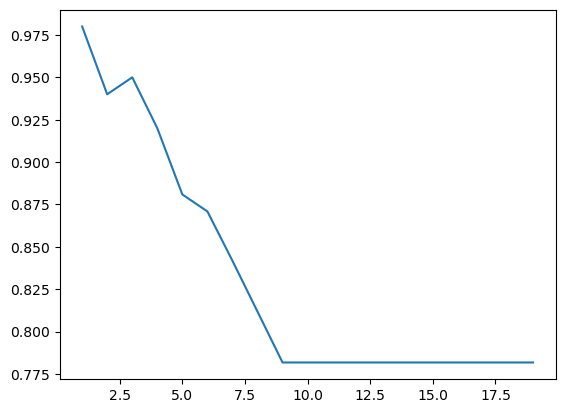

In [40]:
plt.plot(k_range,k_scores)
plt.show()

In [41]:
zoo_final_model=KNC(n_neighbors=12)
zoo_final_model.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=12)

In [42]:
kfold2=KFold(n_splits=8)
results=cross_val_score(zoo_final_model,x,y,cv=kfold2)
results

array([1.        , 0.61538462, 0.92307692, 0.84615385, 0.76923077,
       0.66666667, 0.66666667, 0.66666667])

In [43]:
k_range1=range(1,20)
k_scores1=[]
for k in k_range1:
  knn=KNC(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores1.append(scores.mean())

In [44]:
k_scores1

[0.9800000000000001,
 0.9400000000000001,
 0.95,
 0.9200000000000002,
 0.8809090909090909,
 0.8709090909090909,
 0.8418181818181818,
 0.8118181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819]

In [45]:
yhat_test1 = zoo_final_model.predict(x_test)

In [46]:
confusion_matrix(y_test, yhat_test1)

array([[6, 5, 0, 0, 0, 0],
       [7, 7, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 3],
       [1, 0, 0, 0, 0, 2],
       [0, 1, 0, 0, 0, 7]], dtype=int64)

In [47]:
print(classification_report(y_test, yhat_test1))

              precision    recall  f1-score   support

           1       0.38      0.55      0.44        11
           2       0.47      0.50      0.48        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.58      0.88      0.70         8

    accuracy                           0.47        43
   macro avg       0.24      0.32      0.27        43
weighted avg       0.36      0.47      0.40        43



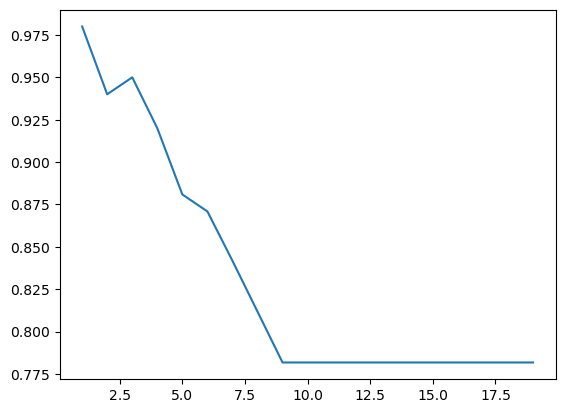

In [48]:
plt.plot(k_range1,k_scores1)
plt.show()